In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import zipfile

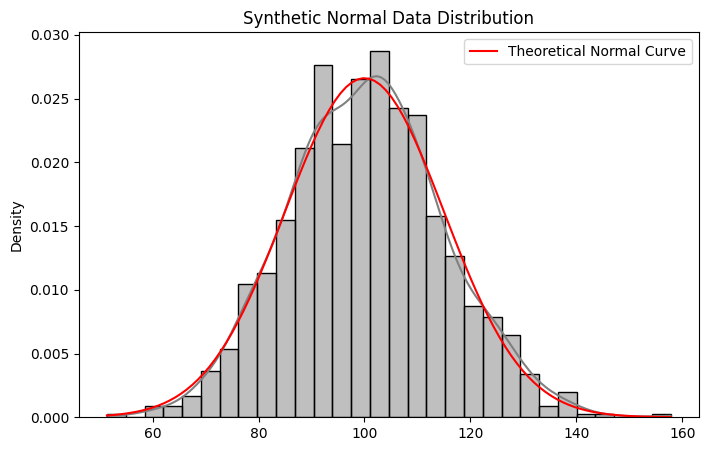

In [11]:
# Generate synthetic normally distributed data
np.random.seed(42)  # For reproducibility
mean, std_dev, size = 100, 15, 1000
synthetic_data = np.random.normal(mean, std_dev, size)

# Plot histogram with normal curve
x = np.linspace(min(synthetic_data), max(synthetic_data), 100)
pdf_values = stats.norm.pdf(x, mean, std_dev)

plt.figure(figsize=(8, 5))
sns.histplot(synthetic_data, bins=30, kde=True, color="gray", stat="density")
plt.plot(x, pdf_values, label="Theoretical Normal Curve", color="red")
plt.legend()
plt.title("Synthetic Normal Data Distribution")
plt.show()


In [12]:
# Load dataset
# Assuming 'archive (7).zip' contains a CSV file named 'data.csv'
with zipfile.ZipFile("/content/archive (7).zip", 'r') as zip_ref:
    # Get the name of the first file in the zip archive
    csv_file_name = zip_ref.namelist()[0]
    # Open the CSV file from the archive
    with zip_ref.open(csv_file_name) as f:
        df = pd.read_csv(f)

# Check for the correct column name
print(df.columns)  # Print available column names

# Select a numerical column
# Replace 'heart_rate' with the actual column name from the printed output above
column = df.columns[1]  # Selecting the 2nd column (index 1), adjust as needed
# Or use any correct column name from the list in df.columns
# Example: column = 'heartrate' or column = 'HR'
data = df[column].dropna()

# Compute summary statistics
mean, std_dev = np.mean(data), np.std(data, ddof=1)
skewness, kurt = stats.skew(data), stats.kurtosis(data)

print(f"Mean: {mean:.2f}, Std Dev: {std_dev:.2f}")
print(f"Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}")

<ipython-input-12-fcc8a490d4c6>:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE',
       'DRUG_TYPE', 'DRUG', 'DRUG_NAME_POE', 'DRUG_NAME_GENERIC',
       'FORMULARY_DRUG_CD', 'GSN', 'NDC', 'PROD_STRENGTH', 'DOSE_VAL_RX',
       'DOSE_UNIT_RX', 'FORM_VAL_DISP', 'FORM_UNIT_DISP', 'ROUTE'],
      dtype='object')
Mean: 38772.74, Std Dev: 29252.89
Skewness: 0.57, Kurtosis: -0.99


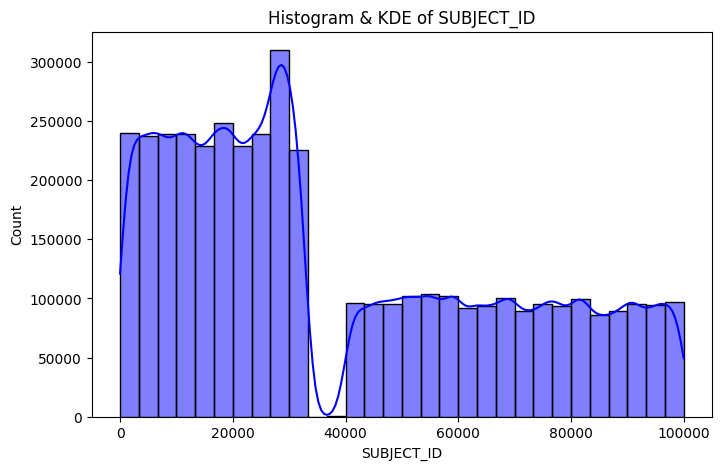

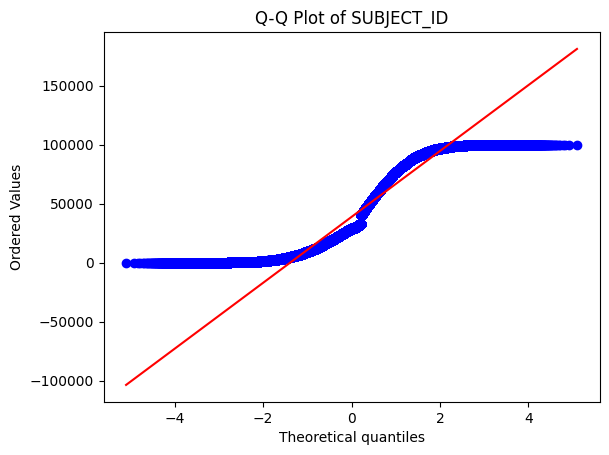

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4156450.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value: 0.0000
Kolmogorov-Smirnov Test p-value: 0.0000


In [13]:
# Plot histogram & KDE
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True, color="blue")
plt.title(f"Histogram & KDE of {column}")
plt.show()

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title(f"Q-Q Plot of {column}")
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(data)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")

# Kolmogorov-Smirnov Test
ks_test = stats.kstest(data, 'norm', args=(mean, std_dev))
print(f"Kolmogorov-Smirnov Test p-value: {ks_test.pvalue:.4f}")


In [14]:
threshold = 80  # Example: Heart rate < 80 bpm
probability = stats.norm.cdf(threshold, mean, std_dev)
print(f"P(Heart Rate < 80): {probability:.4f}")


P(Heart Rate < 80): 0.0930


In [15]:
percentile_90 = stats.norm.ppf(0.90, mean, std_dev)
print(f"90th Percentile of {column}: {percentile_90:.2f}")


90th Percentile of SUBJECT_ID: 76261.83


In [16]:
hr_value = 100
pdf_value = stats.norm.pdf(hr_value, mean, std_dev)
print(f"PDF at {hr_value} bpm: {pdf_value:.6f}")


PDF at 100 bpm: 0.000006


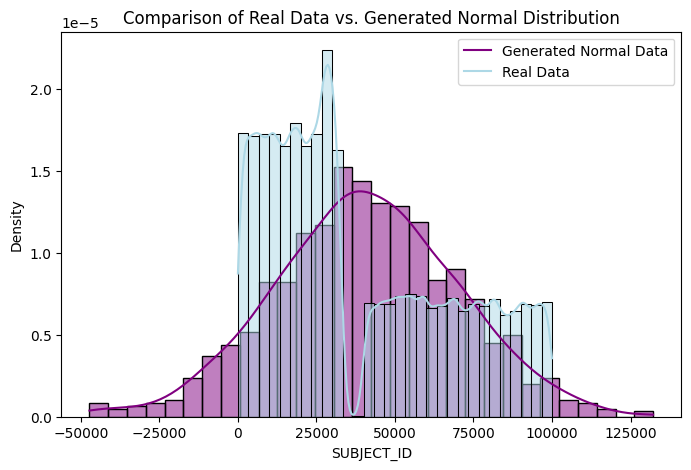

In [17]:
random_samples = np.random.normal(mean, std_dev, 1000)

plt.figure(figsize=(8, 5))
sns.histplot(random_samples, bins=30, kde=True, color="purple", stat="density")
sns.histplot(data, bins=30, kde=True, color="lightblue", stat="density", alpha=0.5)
plt.legend(["Generated Normal Data", "Real Data"])
plt.title("Comparison of Real Data vs. Generated Normal Distribution")
plt.show()


In [18]:
n = len(data)
se = std_dev / np.sqrt(n)
ci_lower, ci_upper = mean - 1.96 * se, mean + 1.96 * se

print(f"95% Confidence Interval for {column}: ({ci_lower:.2f}, {ci_upper:.2f})")


95% Confidence Interval for SUBJECT_ID: (38744.62, 38800.86)


In [19]:
threshold = 150
probability = 1 - stats.norm.cdf(threshold, mean, std_dev)
print(f"P(Systolic BP > 150 mmHg): {probability:.4f}")


P(Systolic BP > 150 mmHg): 0.9066
